In [13]:
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import sklearn
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#nltk.download()

In [4]:
dataset=pd.read_csv('bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


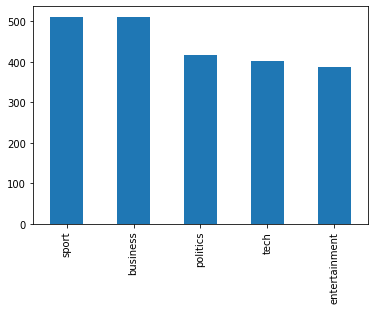

In [7]:
dataset['category'].value_counts().plot('bar')

In [8]:
new_categories={
    'tech':1,
    'sport':2,
    'business':3,
    'politics':4,
    'entertainment':5
}
dataset['category']=dataset['category'].map(new_categories)
dataset.head()

,category,text
0,1,tv future in the hands of viewers with home th...
1,3,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,5,ocean s twelve raids box office ocean s twelve...


In [26]:
sentences_dataset=[]
for i in dataset['text']:
    sentences=nltk.sent_tokenize(i)
    for j in range(len(sentences)):
        words=nltk.word_tokenize(sentences[j])
        newwords=[word for word in words if word not in stopwords.words('English')]
        sentences[j]=' '.join(newwords)  
    sentences=''.join(sentences)    
    sentences_dataset.append(sentences)    

In [33]:
from sklearn.model_selection import train_test_split
sentences_dataset=np.asarray(sentences_dataset)
labels=np.asarray(dataset['category'])
X_train,X_test,y_train,y_test=train_test_split(sentences_dataset,labels,test_size=0.2)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1780 1780
445 445


In [34]:
vocab_size=1000
oov_token='<OOV>'
embedding_dim=16
truncating_type='post'
padding_type='post'
max_length=120

In [36]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
tokenized_X_train=tokenizer.texts_to_sequences(X_train)
padded_X_train=pad_sequences(tokenized_X_train,maxlen=max_length,padding=padding_type,truncating=truncating_type)
tokenized_X_test=tokenizer.texts_to_sequences(X_test)
padded_X_test=pad_sequences(tokenized_X_test,maxlen=max_length,padding=padding_type,truncating=truncating_type)

In [38]:
print(padded_X_train.shape,y_train.shape)
print(padded_X_test.shape,y_test.shape)

(1780, 120) (1780,)
(445, 120) (445,)


In [41]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [42]:
num_epochs=30
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(padded_X_train,y_train,epochs=num_epochs,validation_data=(padded_X_test,y_test))

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 [==============================] - 2s 1ms/sample - loss: 1.7596 - accuracy: 0.3017 - val_loss: 1.7245 - val_accuracy: 0.3281
Epoch 2/30
1780/1780 [==============================] - 0s 107us/sample - loss: 1.6708 - accuracy: 0.3809 - val_loss: 1.6260 - val_accuracy: 0.4337
Epoch 3/30
1780/1780 [==============================] - 0s 155us/sample - loss: 1.5523 - accuracy: 0.4983 - val_loss: 1.4885 - val_accuracy: 0.4876
Epoch 4/30
1780/1780 [==============================] - 0s 133us/sample - loss: 1.3820 - accuracy: 0.5556 - val_loss: 1.3121 - val_accuracy: 0.5640
Epoch 5/30
1780/1780 [==============================] - 0s 201us/sample - loss: 1.1860 - accuracy: 0.6129 - val_loss: 1.1189 - val_accuracy: 0.6674
Epoch 6/30
1780/1780 [==============================] - 0s 187us/sample - loss: 0.9968 - accuracy: 0.7719 - val_loss: 0.9530 - val_accuracy: 0.7955
Epoch 7/30
1780/1780 [==============================] - 0s 157us/sa

In [43]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()

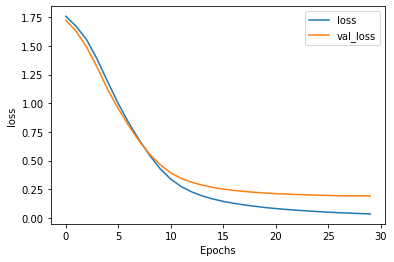

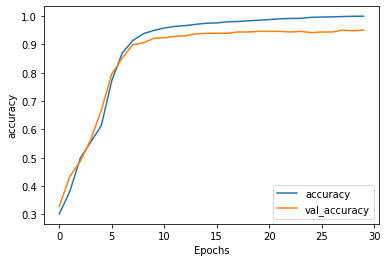

In [44]:
plot_graphs(history,'loss')
plot_graphs(history,'accuracy')